In [1]:
import pandas as pd

df = pd.read_csv("../data/telco_customer_churn.csv")
df = df.drop_duplicates()

df.head()

df.shape
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   str    
 1   gender            7043 non-null   str    
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   str    
 4   Dependents        7043 non-null   str    
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   str    
 7   MultipleLines     7043 non-null   str    
 8   InternetService   7043 non-null   str    
 9   OnlineSecurity    7043 non-null   str    
 10  OnlineBackup      7043 non-null   str    
 11  DeviceProtection  7043 non-null   str    
 12  TechSupport       7043 non-null   str    
 13  StreamingTV       7043 non-null   str    
 14  StreamingMovies   7043 non-null   str    
 15  Contract          7043 non-null   str    
 16  PaperlessBilling  7043 non-null   str    
 17  Paymen

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [2]:
# Convert churn:
df["Churn"] = df["Churn"].map({"Yes": 1, "No": 0})
# Check class balance:
df["Churn"].value_counts(normalize=True)


Churn
0    0.73463
1    0.26537
Name: proportion, dtype: float64

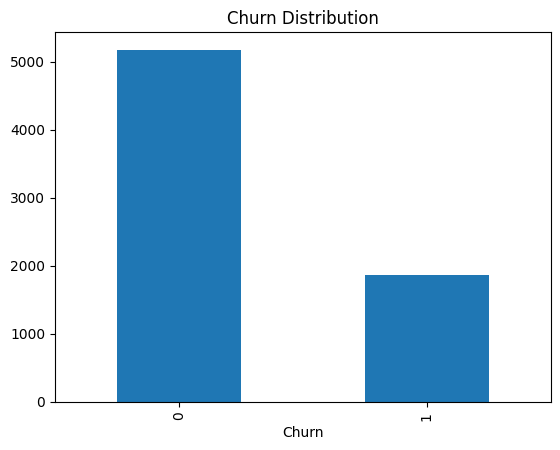

In [3]:
# Plot distribution:
import matplotlib.pyplot as plt

df["Churn"].value_counts().plot(kind="bar")
plt.title("Churn Distribution")
plt.show()


In [4]:
# Clean Common Telco Dataset Issues

# Turn TotalCharges stored as string into numeric, coercing errors to NaN, then drop rows with NaN values
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")
df = df.dropna()

# Drop Useless Columns
df = df.drop(columns=["customerID"])


df.info()

<class 'pandas.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   str    
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   str    
 3   Dependents        7032 non-null   str    
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   str    
 6   MultipleLines     7032 non-null   str    
 7   InternetService   7032 non-null   str    
 8   OnlineSecurity    7032 non-null   str    
 9   OnlineBackup      7032 non-null   str    
 10  DeviceProtection  7032 non-null   str    
 11  TechSupport       7032 non-null   str    
 12  StreamingTV       7032 non-null   str    
 13  StreamingMovies   7032 non-null   str    
 14  Contract          7032 non-null   str    
 15  PaperlessBilling  7032 non-null   str    
 16  PaymentMethod     7032 non-null   str    
 17  MonthlyChar

In [5]:
pd.crosstab(df["Contract"], df["Churn"], normalize="index")



Churn,0,1
Contract,,
Month-to-month,0.572903,0.427097
One year,0.887228,0.112772
Two year,0.971513,0.028487


In [6]:
pd.crosstab(df["InternetService"], df["Churn"], normalize="index")


Churn,0,1
InternetService,,
DSL,0.810017,0.189983
Fiber optic,0.581072,0.418928
No,0.925658,0.074342


In [7]:
pd.crosstab(df["PaymentMethod"], df["Churn"], normalize="index")


Churn,0,1
PaymentMethod,,
Bank transfer (automatic),0.832685,0.167315
Credit card (automatic),0.847469,0.152531
Electronic check,0.547146,0.452854
Mailed check,0.807980,0.192020


In [8]:
pd.crosstab(df["Partner"], df["Churn"], normalize="index")

Churn,0,1
Partner,,
No,0.670239,0.329761
Yes,0.802829,0.197171


In [9]:

pd.crosstab(df["Dependents"], df["Churn"], normalize="index")

Churn,0,1
Dependents,,
No,0.687209,0.312791
Yes,0.844688,0.155312


In [10]:
df.groupby("Churn")[["tenure", "MonthlyCharges", "TotalCharges"]].mean()


,tenure,MonthlyCharges,TotalCharges
Churn,,,
0,37.650010,61.307408,2555.344141
1,17.979133,74.441332,1531.796094


In [11]:
df.groupby("Churn")[["tenure", "MonthlyCharges", "TotalCharges"]].median()


,tenure,MonthlyCharges,TotalCharges
Churn,,,
0,38.0,64.45,1683.60
1,10.0,79.65,703.55


In [12]:
#Correlation Matrix
# 
df.corr(numeric_only=True)["Churn"].sort_values(ascending=False)


Churn             1.000000
MonthlyCharges    0.192858
SeniorCitizen     0.150541
TotalCharges     -0.199484
tenure           -0.354049
Name: Churn, dtype: float64

In [13]:
# Separating numerical_features and categorical_features is necessary : 
# Numb behave mathematically, while Cate are symbolically. They require completely different preprocessing strategies.
# If we treat them the same way, we introduce errors or leakage.
# numb require scaling and statistical imputation, while cate require encoding & different imputation strategies.
# Treating them separately ensures correct mathematical handling, prevents artificial ordering, & avoids data leakage when used inside a pipeline.

numerical_features = df.select_dtypes(include=["int64", "float64"]).columns.tolist()
print("Numerical Features:", numerical_features)


Numerical Features: ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']


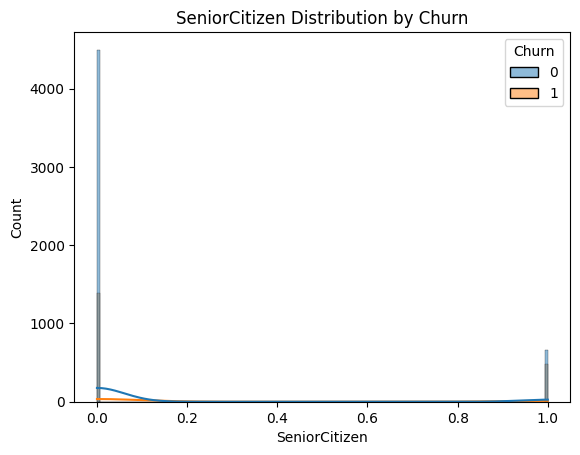

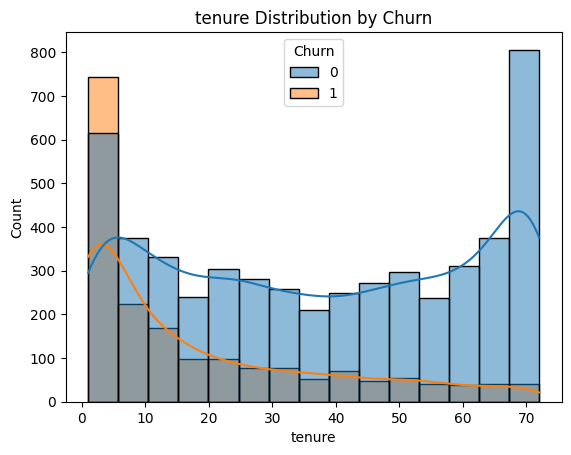

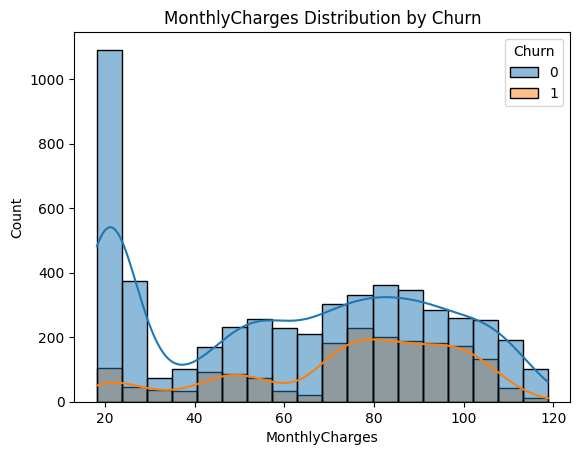

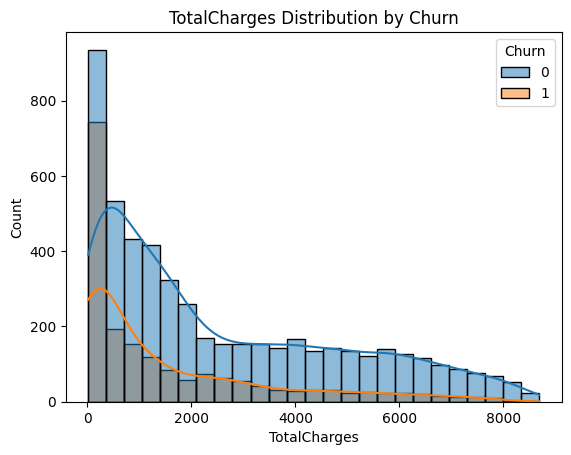

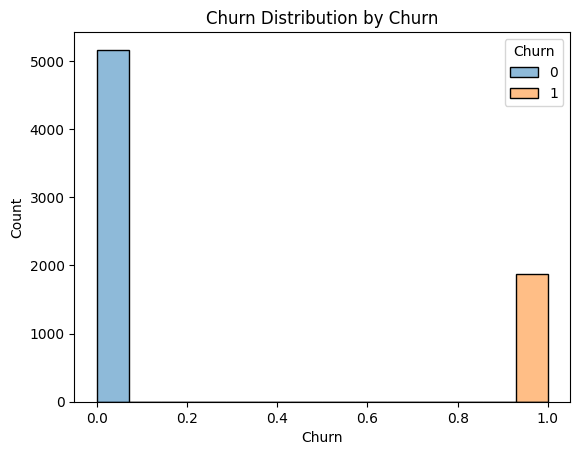

In [14]:
# Modeling intuition : 
# - Do churners spend more?
# -  Do churners have lower tenure?
# - Are distributions separable?


import seaborn as sns

for col in numerical_features:
  plt.figure()
  sns.histplot(data=df, x=col, hue="Churn", kde=True)
  plt.title(f"{col} Distribution by Churn")
  plt.show()


In [15]:
numerical_features.remove("Churn")
categorical_features = df.select_dtypes(include=["object", "string"]).columns.tolist()


print("Categorical Features:", categorical_features)

for col in categorical_features:
  churn_rate = pd.crosstab(df[col], df["Churn"], normalize="index")
  print(f"\n{col}")
  print(churn_rate)


Categorical Features: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

gender
Churn          0         1
gender                    
Female  0.730405  0.269595
Male    0.737954  0.262046

Partner
Churn           0         1
Partner                    
No       0.670239  0.329761
Yes      0.802829  0.197171

Dependents
Churn              0         1
Dependents                    
No          0.687209  0.312791
Yes         0.844688  0.155312

PhoneService
Churn                0         1
PhoneService                    
No            0.750000  0.250000
Yes           0.732525  0.267475

MultipleLines
Churn                    0         1
MultipleLines                       
No                0.749188  0.250812
No phone service  0.750000  0.250000
Yes               0.713515  0.286485

InternetService
Ch

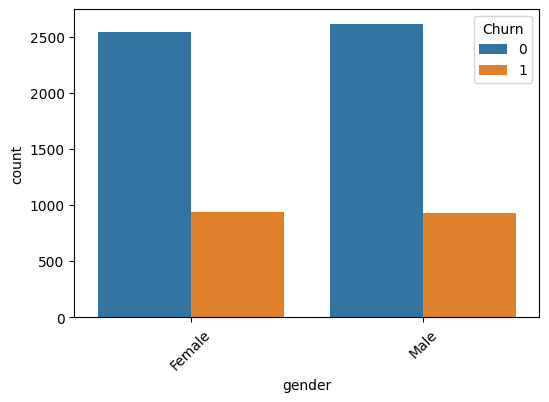

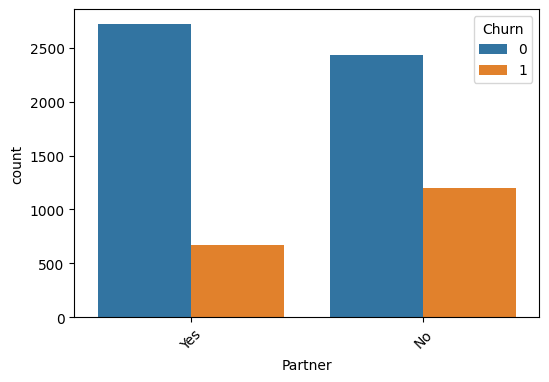

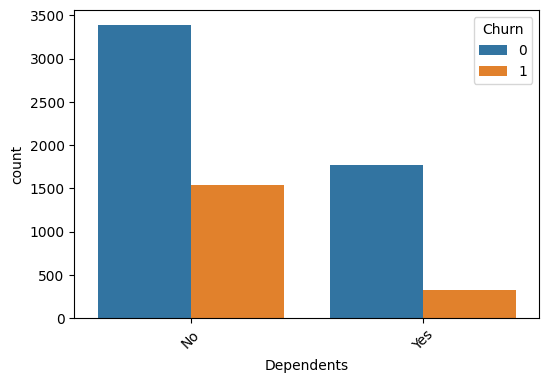

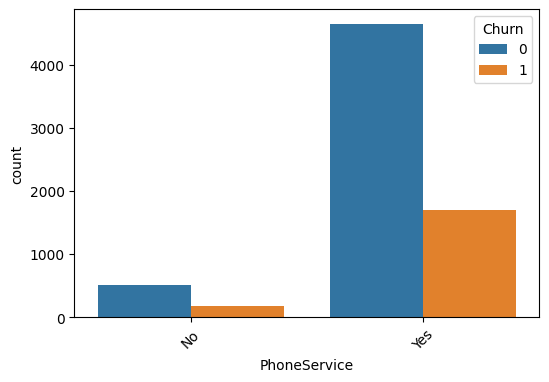

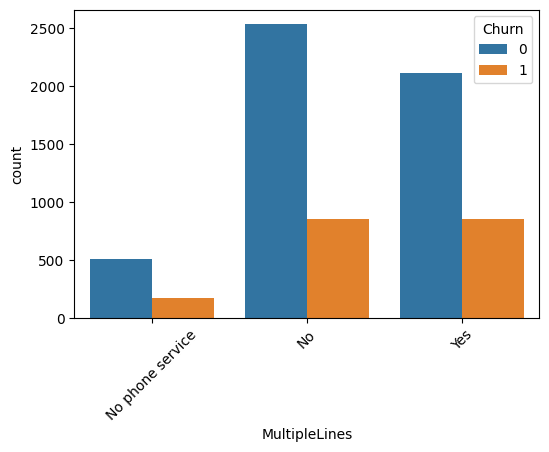

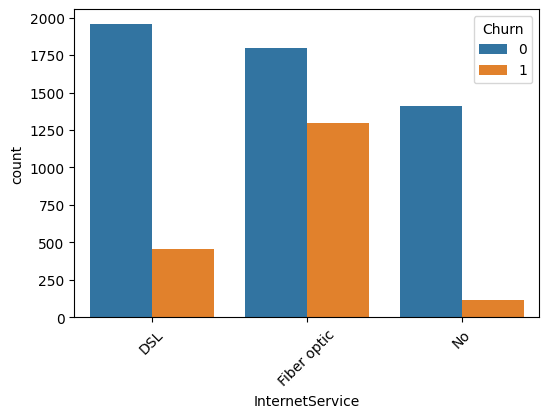

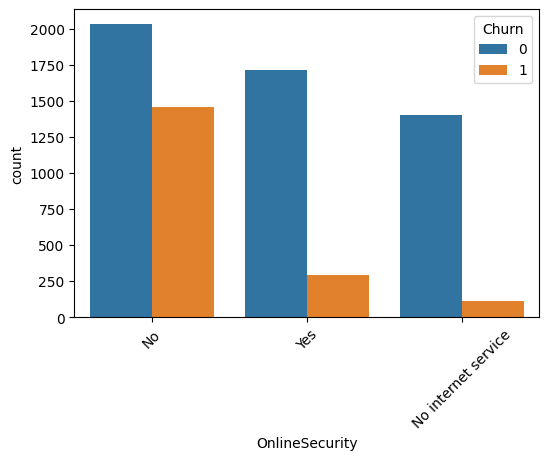

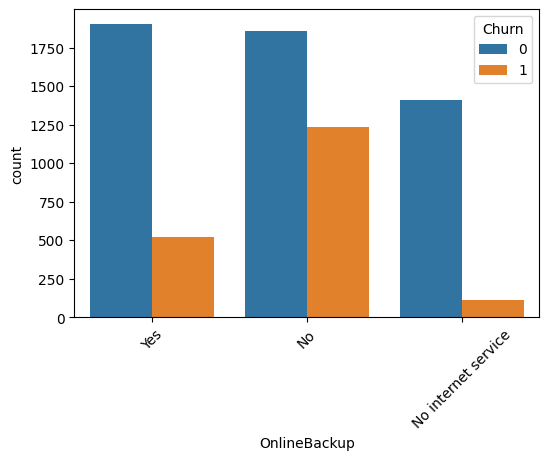

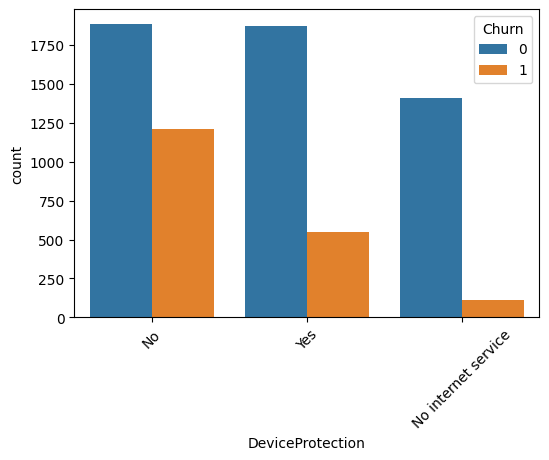

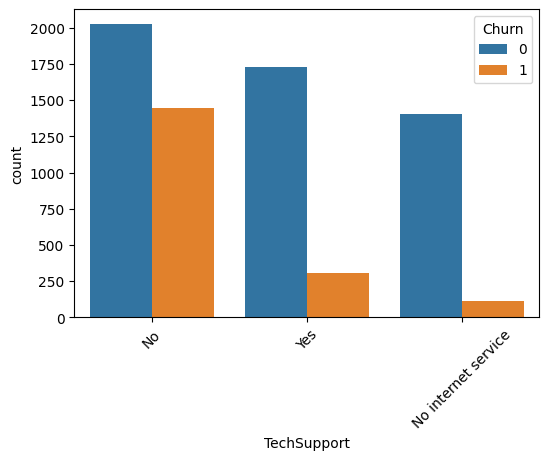

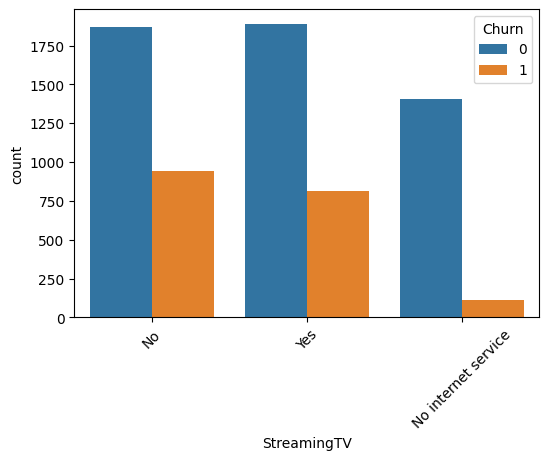

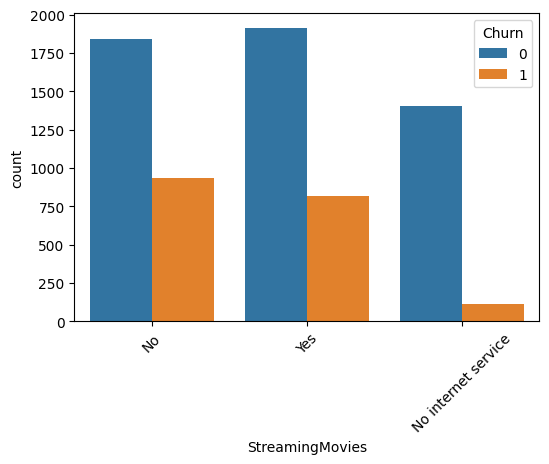

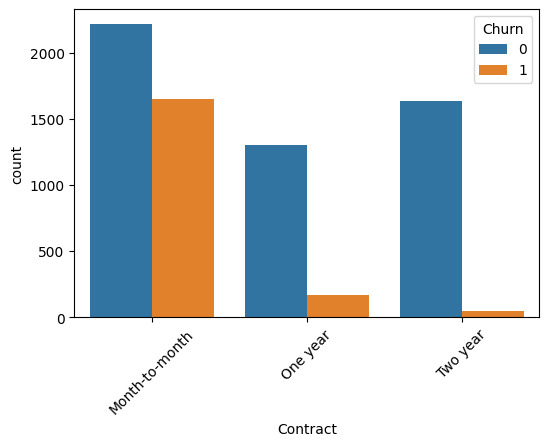

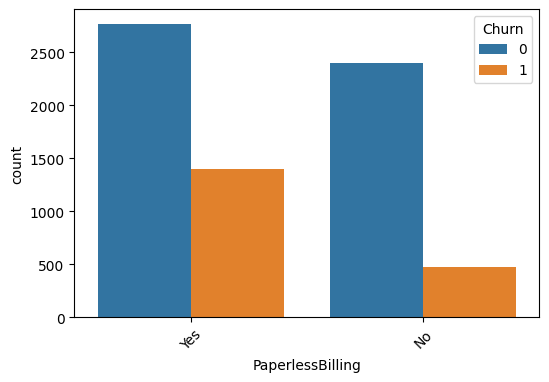

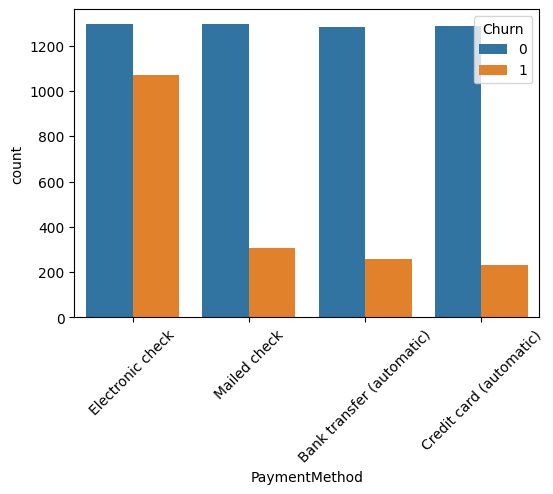

In [16]:
# business-relevant signal : 
# - Do month-to-month contracts churn more?
# - Do fiber customers churn more?
# - Does payment method affect churn?

for col in categorical_features:
  plt.figure(figsize=(6,4))
  sns.countplot(data=df, x=col, hue="Churn")
  plt.xticks(rotation=45)
  plt.show()


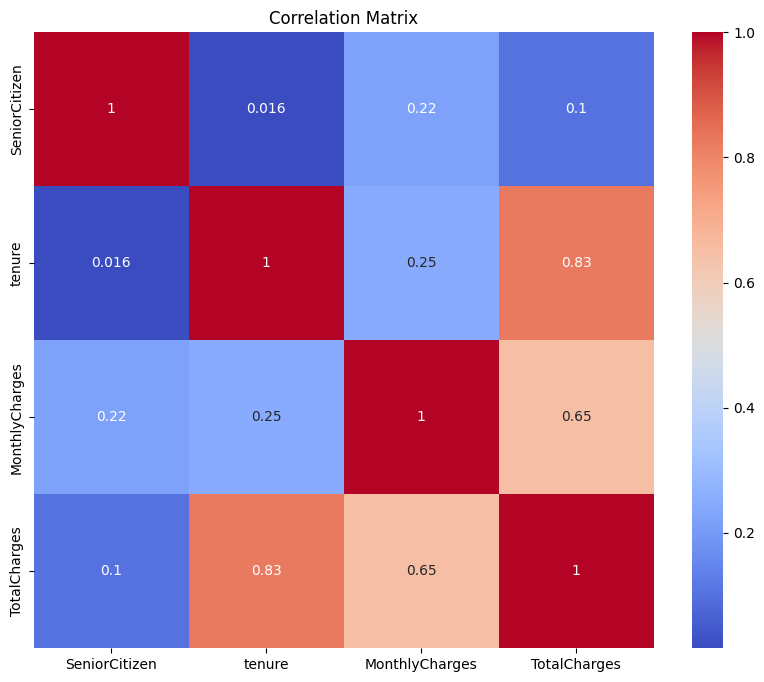

In [17]:
# Checking:
# - Multicollinearity
# - Redundant features
# - Strong correlations

plt.figure(figsize=(10,8))
sns.heatmap(df[numerical_features].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


In [18]:
# Detect Data Leakage

df[df["Churn"] == 1]["tenure"].describe()


count    1869.000000
mean       17.979133
std        19.531123
min         1.000000
25%         2.000000
50%        10.000000
75%        29.000000
max        72.000000
Name: tenure, dtype: float64

In [19]:
# min	1 -> Some customers churned almost immediately
# max	72	-> Some churned after 6 years.
# mean	17.98	-> On average, churners stayed ~18 months
# std	19.53	-> Large variance in tenure.

# we can see that churn happens mostly in early months but can occur later as well 





# FYI, using tenure like this leaks future information into your training data.
# If a feature contains information from after the point you’re trying to predict, it’s leakage.

In [20]:
#Churn by Contract Type
pd.crosstab(df["Contract"], df["Churn"], normalize="index")


Churn,0,1
Contract,,
Month-to-month,0.572903,0.427097
One year,0.887228,0.112772
Two year,0.971513,0.028487


In [21]:
# Churn by Monthly Charges
df.groupby("Churn")["MonthlyCharges"].mean()


Churn
0    61.307408
1    74.441332
Name: MonthlyCharges, dtype: float64

In [22]:
# train/validation/test split of the data 

from sklearn.model_selection import train_test_split

# remove duplicates to avoid data leakage between train and test sets


X = df.drop("Churn", axis=1)
y = df["Churn"]

# If we don’t stratify, the model evaluation becomes unreliable.
# Splits 70% training, 30% temporary set (X_temp) for validation + test
X_train, X_temp, y_train, y_temp = train_test_split(
  X, y, test_size=0.3, stratify=y, random_state=42
)

# Splits the temporary 30% into validation and test, 50/50
X_val, X_test, y_val, y_test = train_test_split(
  X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42
)
print("Train set shape:", X_train.shape)
print("Validation set shape:", X_val.shape)
print("Test set shape:", X_test.shape)




Train set shape: (4922, 19)
Validation set shape: (1055, 19)
Test set shape: (1055, 19)


In [23]:
# Final split:
# - Train → 70% → 4922 samples
# - Validation → 15% → 1055 samples
# - Test → 15% → 1055 samples


#Compare feature distributions

X_train['tenure'].describe()

count    4922.000000
mean       32.490248
std        24.586795
min         1.000000
25%         9.000000
50%        29.000000
75%        56.000000
max        72.000000
Name: tenure, dtype: float64

In [24]:
X_val['tenure'].describe()


count    1055.000000
mean       31.815166
std        24.245756
min         1.000000
25%         8.500000
50%        27.000000
75%        54.000000
max        72.000000
Name: tenure, dtype: float64

In [25]:
X_test['tenure'].describe()

count    1055.000000
mean       32.709005
std        24.662228
min         1.000000
25%         9.000000
50%        29.000000
75%        56.000000
max        72.000000
Name: tenure, dtype: float64

In [26]:
# tenure in training is not much smaller than validation/test, the splits is correct 

In [27]:
int(pd.concat([X_train, X_test]).duplicated().sum())


# since we got rid of the duplicates we can assume that there are customers with:
# - identical features
# - but different Churn values


29

In [31]:
# check to see if there are stil duplicated values in the dataset

df.duplicated().sum()

np.int64(22)

In [32]:
#Build a preprocessing Pipeline

# Making raw data ready for a machine learning model. 
# Apply different preprocessing steps for num and cate feat within the unified pipeline.
# This ensures correct transformations, prevents data leakage, and keeps training and inference consistent.
# Aim : 
# 1. Make data usable by mathematical models
# 2. Put features on comparable scales
# 3. Prevent artificial meaning

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Basic processor  
#preprocessor = ColumnTransformer(
#  transformers=[
#    ("num", StandardScaler(), numerical_features),
#    ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features) 
#    # handle_unknown="ignore" ensures that if we encounter a cat in validation/test that wasn't in training, it won't cause an error, but will instead be ignored (all zeros in the encoded vector). This prevents data leakage and allows the model to handle unseen categories gracefully.
#  ]
#)

# Processor bullet proof handling missing values for each type of feature

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

def build_preprocessor(numerical_features, categorical_features):

  # Numerical pipeline
  numeric_pipeline = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
  ])
  # Imputing (filling in missing values) will be done using the median 
  # Scaling ( scaler) use to rescal numerical features so they are on a similar range.( can impact the weight of the variable in the dominates the model )


  # Categorical pipeline
  categorical_pipeline = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
  ])
  # Imputing will be done using the most frequent value

  # Combine both pipelines
  preprocessor = ColumnTransformer(
    transformers=[
      ("num", numeric_pipeline, numerical_features),
      ("cat", categorical_pipeline, categorical_features)
    ]
  )

  return preprocessor

preprocessor = build_preprocessor(numerical_features, categorical_features)



In [33]:
#Create Full Pipeline
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

pipeline = Pipeline(steps=[
  ("preprocessor", preprocessor),
  ("classifier", LogisticRegression(max_iter=1000))
])


In [34]:
#Train the Model
pipeline.fit(X_train, y_train)


,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('preprocessor', ...), ('classifier', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('num', ...), ('cat', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transforme

In [35]:
from sklearn.metrics import classification_report, roc_auc_score

y_pred = pipeline.predict(X_val)
y_proba = pipeline.predict_proba(X_val)[:, 1]

print(classification_report(y_val, y_pred))
print("ROC-AUC:", roc_auc_score(y_val, y_proba))


              precision    recall  f1-score   support

           0       0.86      0.90      0.88       774
           1       0.69      0.60      0.65       281

    accuracy                           0.82      1055
   macro avg       0.78      0.75      0.76      1055
weighted avg       0.82      0.82      0.82      1055

ROC-AUC: 0.8532304339430052


In [1]:
#Save the pipeline

import joblib

joblib.dump(pipeline, "churn_pipeline.pkl")


NameError: name 'pipeline' is not defined